In [8]:
%matplotlib inline

import pandas as pd
from datetime import datetime
import KN309Muzyka_graf

In [9]:
DataFrame = pd.read_csv("DATABASE.csv", delimiter=";")

#Date parsing and converting to datetime format
DataFrame["day/month"] = pd.to_datetime(pd.to_datetime(DataFrame["day/month"] + ".2019").dt.strftime("%d-%m-%Y"))
DataFrame.rename(columns={'day/month': 'Date'}, inplace=True)
DataFrame = DataFrame.set_index(['Date'])

#Other columns
DataFrame['Time'] = pd.to_datetime(DataFrame['Time']).dt.strftime('%H:%M')
DataFrame['Humidity'] = DataFrame['Humidity'].str.replace('%', '').astype(float) / 100.0
DataFrame["Wind Speed"] = DataFrame["Wind Speed"].str.replace(' mph', '').astype(int)
DataFrame["Wind Gust"] = DataFrame["Wind Gust"].str.replace(' mph', '').astype(int)
DataFrame["Pressure"] = DataFrame["Pressure"].str.replace(',', '.').astype(float)
print(DataFrame)

             Time  Temperature  Dew Point  Humidity  Wind  Wind Speed  \
Date                                                                    
2019-07-16  00:20           72         57      0.60   VAR           1   
2019-07-16  00:50           73         57      0.57     W           3   
2019-07-16  01:20           75         57      0.53  CALM           0   
2019-07-16  01:50           72         57      0.60  CALM           0   
2019-07-16  02:20           72         57      0.60  CALM           0   
...           ...          ...        ...       ...   ...         ...   
2019-08-13  21:50           77         50      0.39   VAR           2   
2019-08-13  22:20           77         48      0.36   VAR           1   
2019-08-13  22:50           73         50      0.44     N          13   
2019-08-13  23:20           73         50      0.44     N           7   
2019-08-13  23:50           73         50      0.44   NNW           6   

            Wind Gust  Pressure  Precip.  Precip A

No handles with labels found to put in legend.


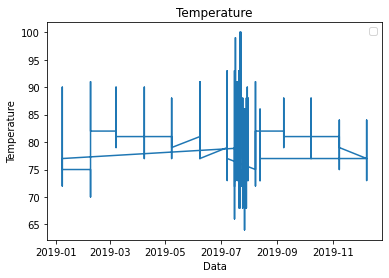

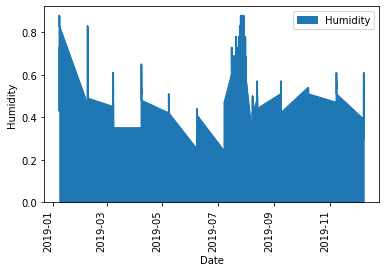

No handles with labels found to put in legend.


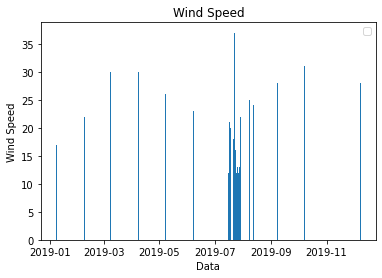

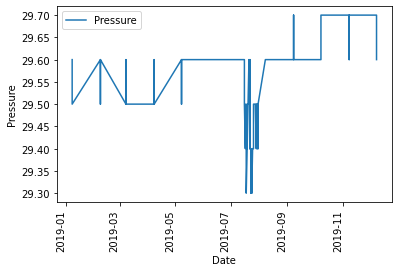

In [12]:
columns = ["Temperature", "Humidity", "Wind Speed", "Pressure"]

for i in columns:
    KN309Muzyka_graf.vizualize(DataFrame, i)



In [69]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1380 entries, 2019-07-16 to 2019-08-13
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time          1380 non-null   object 
 1   Temperature   1380 non-null   int64  
 2   Dew Point     1380 non-null   int64  
 3   Humidity      1380 non-null   float64
 4   Wind          1380 non-null   object 
 5   Wind Speed    1380 non-null   int32  
 6   Wind Gust     1380 non-null   int32  
 7   Pressure      1380 non-null   float64
 8   Precip.       1380 non-null   int64  
 9   Precip Accum  1380 non-null   int64  
 10  Condition     1380 non-null   object 
dtypes: float64(2), int32(2), int64(4), object(3)
memory usage: 118.6+ KB
